In [700]:
%reload_ext autoreload
%autoreload 2
#import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
import os

import experiment_helpers

#debug
from importlib import reload
from experiment_helpers import *
reload(experiment_helpers)
from experiment_helpers import *

In [701]:
### update per hardware setting
## updates plot titles when uploading charts to chart-studio.
PLACE="CLOUDLAB:"

In [702]:
def add_annotation(text):
    anno = "<h3><pre>%s</pre></h3>" % text
    annotations.append(anno)

In [703]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### set up remote plotting

In [704]:
if os.getlogin() == 'narekg':
    # Please do not override my chartly plots if you are not me
    chart_studio.tools.set_credentials_file(username='ngalstyan', api_key='dApbes8sgyjaWkPJL8cA')

from datetime import date
UPLOAD_PLOTS = False
def plot(fig):
    fig.layout.title.text = PLACE + fig.layout.title.text
    if UPLOAD_PLOTS:
        f = "%s:%s" % (date.today(), fig.layout.title.text)
        f = f[:50]
        url = py.plot(fig, auto_open=False)
        print(url)
        fig.layout.title.text += url

    return fig.show()

# Experiment plots

## Define experiments

In [705]:
EXPERIMENT_TYPES = [
#     "no_prefetching",
#     "linux_prefetching_asyncwrites",
    #"linux_prefetching_ssdopt",
    #"linux_prefetching_ssdopt_asyncwrites",
    #"linux_prefetching_ssdopt_asyncwrites",

#     "tape_prefetching_syncwrites",
    "tape_prefetching_asyncwrites",
   # "tape_prefetching_asyncwrites_linux",

    #"tape_prefetching_asyncwrites_offload_fetch",
]
annotations=[]

In [706]:
WORKLOADS = ["mmult_eigen",  "mmult_eigen_dot", "mmult_eigen_vec",  "python", "sparse_eigen"
             # "vec_eigen",
             # "dot_eigen", "mmap_random_rw","kissfft",  "kmeans", "torch",
             # "bitonic_merge", "native_sort",
             # "bitonic_sort", "torch", "torch_par","torch_par4","linpack", "mmult_eigen_par"
             # "alexnet", "vgg16", "batcher_sort"
            ]

## Load data(single pandas table of all experiments per workload)

In [707]:
data = {}
def update_data(path, ind=1):
    global data
    data = {}
    for workload in WORKLOADS:
        data[workload] = augment_tables(get_experiment_data(EXPERIMENT_TYPES, ind, workload,path), filter_raw=True)
        
update_data("../prefetching-data/evictions-data/multiprocess/10gbps/experiment_results_nproc_3")

## Explore & Plot

In [763]:
ls ../experiment_results_fft_nproc_1

pyfft/


In [772]:
WORKLOADS = ["mmult_eigen_dot"]
data_dir = "../prefetching-data/evictions-data/multiprocess/10gbps/experiment_results_nproc_1"

data_dir = "../prefetching-data/evictions-data/multiprocess/25gpbs/experiment_results_nproc_10"
data_dir = "../experiment_results_fft_nproc_1"
# data_dir = "../prefetching-data/evictions-data/multiprocess/56gbps/experiment_results_nproc_11"

update_data(data_dir, ind=1)


FileNotFoundError: [Errno 2] No such file or directory: '../experiment_results_fft_nproc_1/mmult_eigen_dot/tape_prefetching_asyncwrites/1/cgroup_results.csv'

In [770]:
from experiment_helpers import get_eviction_to_total

for workload in WORKLOADS:
    fig = get_eviction_to_total(data[workload], "%s" % workload)
#     fig.update_layout(yaxis_range=[0,15])
    plot(fig)

/mydata/oblivious/experiments/analysis/experiment_helpers.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/mydata/oblivious/experiments/analysis/experiment_helpers.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/mydata/oblivious/experiments/analysis/experiment_helpers.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [771]:
runtime_components = []

for workload in WORKLOADS:
    fig = get_components_of_runtime(data[workload], "%s" % workload)
    runtime_components.append(fig)
    fig.update_layout(yaxis_range=[0,15])
    plot(fig)

In [605]:
app2ev

,RATIO,mmult_eigen,mmult_eigen_dot,mmult_eigen_vec,python,sparse_eigen
0,90,NaN,3,3,NaN,NaN
1,80,NaN,3,3,NaN,NaN
2,70,7.0,3,3,6.0,7.0
3,60,6.0,3,3,6.0,6.0
4,50,6.0,3,3,6.0,6.0
5,40,4.0,3,3,5.0,5.0
6,30,4.0,3,4,4.0,4.0
7,20,4.0,4,4,4.0,4.0


In [543]:
app2ev = pd.read_csv("../25g.tsv",sep="\t")

fig = px.line(app2ev, 
                x='RATIO', 
              y=[ 'mmult_eigen_dot',  'mmult_eigen','sparse_eigen'],
                      title= "NIC traffic: mmult_eigen, %s" % exp
                    )

fig.update_layout(
    xaxis_title="Ratio",
    yaxis_title="App CPUs per 1 eviction cpu",
)
plot(fig)

In [780]:
import collections
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# For recent conferences, I've had HotCRP complain about missing fonts unless I include this line
matplotlib.rcParams['pdf.fonttype'] = 42



/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21299/1135104509.py:28: UserWarning:

FixedFormatter shou

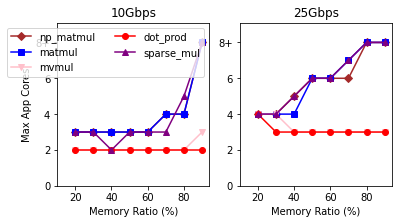

In [781]:
# plt.figure(figsize = (6, 3))
INFINITY=8
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
app2ev10 = pd.read_csv("../10g.tsv",sep="\t").fillna(INFINITY)
app2ev25 = pd.read_csv("../25g.tsv",sep="\t").fillna(INFINITY)
app2ev56 = pd.read_csv("../56g.tsv",sep="\t").fillna(INFINITY)


np_mmul_style = {"label": "np_matmul", "color": "brown", "marker": "D",}
mmul_style = {"label": "matmul", "color": "blue", "marker": "s", }
mmul3_style = {"label": "matmul_3", "color": "black", "marker": "*"}
mvmul_style = {"label": "mvmul", "color": "pink", "marker": "v"}
dprod_style = {"label": "dot_prod", "color": "red", "marker": "o"}
sparse_style = {"label": "sparse_mul", "color": "purple", "marker": "^"}
np_fft_style = {"label": "np_fft", "color": "green", "marker": "p"}


workloads = ["python", "mmult_eigen", "mmult_eigen_vec", "mmult_eigen_dot", "sparse_eigen",]# "pyfft"]
styles = [np_mmul_style, mmul_style, mvmul_style,dprod_style, sparse_style ]

for i, n, t in [(0, "10Gbps", app2ev10), (1, "25Gbps", app2ev25)]: #, (2, "56Gbps", app2ev56)]:
    for workload, style in zip(workloads, styles):
        axes[i].plot(t["RATIO"], t[workload] , **style)
        axes[i].set_title(n)
        axes[i].set_xlabel("Memory Ratio (%)")
        axes[i].set_ylim(0, 9.1)
        axes[i].set_xlim(10, 94)
        axes[i].set_yticklabels(["0", "2", "4", "6", str(INFINITY)+"+", ])
        axes[0].legend(ncol=2)
        axes[0].set_ylabel("Max App Cores")
        
        
#     plt.legend()
#     plt.xlabel("Memory Ratio (%)")
#     plt.ylabel("Ratio")
#     fig.suptitle("App CPUs per 1 eviction CPU", y=1.02)
    fig.show()

In [759]:
app2ev = pd.DataFrame()

fig = px.line(exp_nic_data, 
                x='Time(s)', y=[ #'Xmit(MB)','Recv(MB)',
                                'Xmit Rate(Gbps)', 'Recv Rate(Gbps)'],
                      animation_frame="RATIO",
                      title= "NIC traffic: mmult_eigen, %s" % exp
                    )

        fig.update_layout(
            xaxis_title="Seconds after App start",
            yaxis_title="Bandwidth (Gbps)",
        )
        plot(fig)

IndentationError: unexpected indent (3882101515.py, line 10)

In [775]:
# data_dir = "../final2_exp_results/experiment_results_nproc_6"
data_dir = "../prefetching-data/evictions-data/multiprocess/10gbps/experiment_results_nproc_1"

for w in ["mmult_eigen"]:#WORKLOADS:
    nic_data = get_nic_monitor_data(EXPERIMENT_TYPES,  w, data_dir)

    for exp in EXPERIMENT_TYPES:
        exp_nic_data = nic_data.loc[nic_data["Experiment Name"] == exp].sort_values(["RATIO", "Time(s)"])

        sum_data = 0
        sum_time = 0
        for ratio in set(exp_nic_data["RATIO"]):
            #[tx, rx]
            sum_data = [0,0]
            sum_time = [0,0]
            last_row = [0,0, 0]
            vs = [[], []]

            for i, row in exp_nic_data[exp_nic_data["RATIO"] == ratio].iterrows():
                tx, rx, t = row['Xmit(MB)'], row['Recv(MB)'], row['Time(s)']

                for i,v in enumerate([tx, rx]):
                    vs[i].append((v - last_row[i])/ (t - last_row[2]+0.0001) * 8/1024)
                    last_row[i] = v
                last_row[2] = t


            exp_nic_data.loc[exp_nic_data["RATIO"] == ratio, "Xmit Rate(Gbps)"] = vs[0]
            exp_nic_data.loc[exp_nic_data["RATIO"] == ratio, "Recv Rate(Gbps)"] = vs[1]

        fig = px.line(exp_nic_data, 
                x='Time(s)', y=[ #'Xmit(MB)','Recv(MB)',
                                'Xmit Rate(Gbps)', 'Recv Rate(Gbps)'],
                      animation_frame="RATIO",
                      title= "NIC traffic: mmult_eigen, %s" % exp
                    )

        fig.update_layout(
            xaxis_title="Seconds after App start",
            yaxis_title="Bandwidth (Gbps)",
        )
        plot(fig)
#         fig.show()


Multi-Switch Analysis
==================

In [ ]:
hops = (0, 1, 2, 3, 4)
data_by_hop = {}
for hop in hops:
    data_by_hop[hop] = {}
    for workload in WORKLOADS:
        data_by_hop[hop][workload] = augment_tables(get_experiment_data(EXPERIMENT_TYPES, workload,"../experiment_results_{0}".format(hop)), filter_raw=True)

In [ ]:
SLICE_RATIO = 30

frames_by_hop = []
for hop in data_by_hop:
    data = data_by_hop[hop]
    degradations = take_column_named("Degradation(%)",data).dropna()
#     degradations = take_column_named("Measured(wallclock) runtime",data).dropna()
    degradation_for_hop = degradations.loc[SLICE_RATIO]
    degradation_for_hop["Hop Count"] = hop
    degradation_for_hop = degradation_for_hop.set_index("Hop Count")
    frames_by_hop.append(degradation_for_hop)
    
hop_frame = pd.concat(frames_by_hop)
hop_frame

In [ ]:
fig = px.line(hop_frame, title='Normalized Runtime(Wallclock) vs. Local Memory', 
              animation_frame="Experiment Name")
fig.update_layout(
    xaxis_title="Hop Count",
    yaxis_title="Normalized Runtime(Wallclock)",
    yaxis_range=[0, 800],
)

In [ ]:
runtime_components = []

def revised_get_components_of_runtime(table, name="unnamed"):
    sub_tbl = table[["Baseline User Time",
                     "Extra User Time",
                     "Eviction Time",
                     "Baseline minor PF Time",
                     "Extra Minor PF Time",
                     "Major PF Time",
                                     ]] / 1e6
    sub_tbl["Experiment Name"] = table["Experiment Name"]
    fig = px.area(sub_tbl, title='Components of runtime(%s)'%name,
                  color_discrete_sequence=['#ab63fa', '#3c0c73', '#636efa', '#ef553b',  '#9e1700','#00cc96'],
                  animation_frame="Experiment Name")
    fig.update_layout(
        xaxis_title="Hop Count",
        yaxis_title="Time(seconds)",
    )
 #   fig.add_trace(px.line(table["Measured(wallclock) runtime"]).data[0])
  #  fig.add_trace(px.line(table["sys+usr"] / 1e6).data[0])

    def anno(text, posx = 1.1, posy=0.32):
        dy = -0.04
        if anno.counter > 0:
            posx += 0.15
        fig.add_annotation(text=text,
              xref="paper", yref="paper",
              x=posx, y=posy + dy * anno.counter, showarrow=False)
        anno.counter+= 1
    anno.counter = 0

    #anno("Workload constants:")
    #anno("Baseline System Time(s): %.2f" % (table["Baseline System Time"].values[0]/1e6))
    #anno("Baseline App Time(s): %.2f" % (table["Baseline App Time(us)"].values[0] / 1e6))
    #anno("Baseline Minor PF Time(us): %.2f" % table["Baseline Single Minor PF Time(us)"].values[0])

    return fig

for workload in WORKLOADS:
    hop_data_frames = []
    for hop in data_by_hop:
        data_for_hop = data_by_hop[hop][workload]
        data_for_hop = data_for_hop.loc[SLICE_RATIO]
        data_for_hop["Hop Count"] = hop
        data_for_hop = data_for_hop.set_index("Hop Count")
        hop_data_frames.append(data_for_hop)
    hop_data = pd.concat(hop_data_frames)
    fig = revised_get_components_of_runtime(hop_data, "%s" % workload)
    runtime_components.append(fig)
    fig.update_layout(yaxis_range=[0,20])
    plot(fig)